# Wines Review Analysis

In [1]:
#Dependancies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import re
import scipy.stats as st


In [2]:
wines_csv = "dropped_wine_data.csv"
wine_df = pd.read_csv(wines_csv)
wine_df.head()

,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


In [3]:
print([wine_df.count()])


[Unnamed: 0     129971
country        129908
points         129971
price          120975
province       129908
region_1       108724
region_2        50511
taster_name    103727
title          129971
variety        129970
winery         129971
dtype: int64]


In [4]:
#drop old index from data
wine_df2 = wine_df.drop(columns='Unnamed: 0', axis=1)
print([wine_df2])
wine_df2.info()

[         country  points  price           province             region_1  \
0          Italy      87    NaN  Sicily & Sardinia                 Etna   
1       Portugal      87   15.0              Douro                  NaN   
2             US      87   14.0             Oregon    Willamette Valley   
3             US      87   13.0           Michigan  Lake Michigan Shore   
4             US      87   65.0             Oregon    Willamette Valley   
...          ...     ...    ...                ...                  ...   
129966   Germany      90   28.0              Mosel                  NaN   
129967        US      90   75.0             Oregon               Oregon   
129968    France      90   30.0             Alsace               Alsace   
129969    France      90   32.0             Alsace               Alsace   
129970    France      90   21.0             Alsace               Alsace   

                 region_2         taster_name  \
0                     NaN       Kerin O’Keefe   


In [5]:
#Create single region column
index = 0

for index, row in wine_df2.iterrows():
    if wine_df2.loc[index, 'region_1'] == wine_df2.loc[index, 'region_2']:
        wine_df2.loc[index, 'region_2'] = np.nan

wine_df2

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,NaN,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,NaN,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [6]:
print([wine_df2.count()])
wine_df2.info()

[country        129908
points         129971
price          120975
province       129908
region_1       108724
region_2        45239
taster_name    103727
title          129971
variety        129970
winery         129971
dtype: int64]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129971 entries, 0 to 129970
Data columns (total 10 columns):
country        129908 non-null object
points         129971 non-null int64
price          120975 non-null float64
province       129908 non-null object
region_1       108724 non-null object
region_2       45239 non-null object
taster_name    103727 non-null object
title          129971 non-null object
variety        129970 non-null object
winery         129971 non-null object
dtypes: float64(1), int64(1), object(8)
memory usage: 9.9+ MB


In [7]:
wine_df2

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,Italy,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,87,15.0,Douro,NaN,NaN,Roger Voss,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,87,14.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,87,65.0,Oregon,Willamette Valley,NaN,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
...,...,...,...,...,...,...,...,...,...,...
129966,Germany,90,28.0,Mosel,NaN,NaN,Anna Lee C. Iijima,Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef)
129967,US,90,75.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,France,90,30.0,Alsace,Alsace,NaN,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,France,90,32.0,Alsace,Alsace,NaN,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [8]:
wine_df3 = wine_df.drop('region_2', axis=1)
wine_df3.count()

Unnamed: 0     129971
country        129908
points         129971
price          120975
province       129908
region_1       108724
taster_name    103727
title          129971
variety        129970
winery         129971
dtype: int64

In [9]:
clean_wine_df3 = wine_df3.dropna()
clean_wine_df3

,Unnamed: 0,country,points,price,province,region_1,taster_name,title,variety,winery
2,2,US,87,14.0,Oregon,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,87,13.0,Michigan,Lake Michigan Shore,Alexander Peartree,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,87,65.0,Oregon,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,87,15.0,Northern Spain,Navarra,Michael Schachner,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,87,16.0,Sicily & Sardinia,Vittoria,Kerin O’Keefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
...,...,...,...,...,...,...,...,...,...,...
129965,129965,France,90,28.0,Alsace,Alsace,Roger Voss,Domaine Rieflé-Landmann 2013 Seppi Landmann Va...,Pinot Gris,Domaine Rieflé-Landmann
129967,129967,US,90,75.0,Oregon,Oregon,Paul Gregutt,Citation 2004 Pinot Noir (Oregon),Pinot Noir,Citation
129968,129968,France,90,30.0,Alsace,Alsace,Roger Voss,Domaine Gresser 2013 Kritt Gewurztraminer (Als...,Gewürztraminer,Domaine Gresser
129969,129969,France,90,32.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2012 Pinot Gris (Alsace),Pinot Gris,Domaine Marcel Deiss


In [10]:
# Find Califorinian wines
california_wines = wine_df2.loc[wine_df2['province'] == "California"]
california_wines

,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
10,US,87,19.0,California,Napa Valley,Napa,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
12,US,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
14,US,87,12.0,California,Central Coast,NaN,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
23,US,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
...,...,...,...,...,...,...,...,...,...,...
129942,US,90,35.0,California,Sonoma County,Sonoma,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood
129945,US,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
129949,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
129950,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry


In [11]:
clean_ca_wines = california_wines.dropna()
clean_ca_wines = clean_ca_wines.reset_index()
clean_ca_wines

,index,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,10,US,87,19.0,California,Napa Valley,Napa,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
1,12,US,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
2,23,US,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
3,25,US,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
4,29,US,86,16.0,California,Clarksburg,Central Valley,Virginie Boone,Clarksburg Wine Company 2010 Chenin Blanc (Cla...,Chenin Blanc,Clarksburg Wine Company
...,...,...,...,...,...,...,...,...,...,...,...
17403,129942,US,90,35.0,California,Sonoma County,Sonoma,Virginie Boone,Arrowood 2010 Cabernet Sauvignon (Sonoma County),Cabernet Sauvignon,Arrowood
17404,129945,US,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
17405,129949,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
17406,129950,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry


In [11]:
#ordered list of counts of CA wines


In [12]:
clean_gbl_wines = wine_df.dropna()
clean_gbl_wines = clean_gbl_wines.reset_index()
clean_gbl_wines

,index,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,10,10,US,87,19.0,California,Napa Valley,Napa,Virginie Boone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
3,12,12,US,87,34.0,California,Alexander Valley,Sonoma,Virginie Boone,Louis M. Martini 2012 Cabernet Sauvignon (Alex...,Cabernet Sauvignon,Louis M. Martini
4,14,14,US,87,12.0,California,Central Coast,Central Coast,Matt Kettmann,Mirassou 2012 Chardonnay (Central Coast),Chardonnay,Mirassou
...,...,...,...,...,...,...,...,...,...,...,...,...
34554,129945,129945,US,90,20.0,California,Santa Ynez Valley,Central Coast,Matt Kettmann,Birichino 2013 Jurassic Park Vineyard Old Vine...,Chenin Blanc,Birichino
34555,129949,129949,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Flora Springs 2013 Barrel Fermented Chardonnay...,Chardonnay,Flora Springs
34556,129950,129950,US,90,35.0,California,Napa Valley,Napa,Virginie Boone,Hendry 2012 Blocks 7 & 22 Zinfandel (Napa Valley),Zinfandel,Hendry
34557,129952,129952,US,90,22.0,California,Chiles Valley,Napa,Virginie Boone,Houdini 2011 Zinfandel (Chiles Valley),Zinfandel,Houdini


In [13]:
clean_gbl_wines_noca = clean_gbl_wines.loc[clean_gbl_wines['province'] != "California"]
clean_gbl_wines_noca = clean_gbl_wines_noca.reset_index()
clean_gbl_wines_noca

,level_0,index,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
0,0,2,2,US,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
1,1,4,4,US,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
2,5,21,21,US,87,20.0,Oregon,Oregon,Oregon Other,Paul Gregutt,Acrobat 2013 Pinot Noir (Oregon),Pinot Noir,Acrobat
3,9,35,35,US,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath
4,10,41,41,US,86,22.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,Hawkins Cellars 2009 Pinot Noir (Willamette Va...,Pinot Noir,Hawkins Cellars
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16170,34549,129919,129919,US,91,105.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,Nicholas Cole Cellars 2004 Reserve Red (Walla ...,Red Blend,Nicholas Cole Cellars
16171,34550,129926,129926,US,91,41.0,Washington,Walla Walla Valley (WA),Columbia Valley,Paul Gregutt,Reininger 2005 Ash Hollow Vineyard Syrah (Wall...,Syrah,Reininger
16172,34551,129927,129927,US,91,28.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Tamarack Cellars 2006 Cabernet Franc (Columbia...,Cabernet Franc,Tamarack Cellars
16173,34552,129935,129935,US,91,38.0,Washington,Columbia Valley-Walla Walla Valley,Columbia Valley,Paul Gregutt,Va Piano 2006 Syrah (Columbia Valley-Walla Wal...,Syrah,Va Piano


[variety
Pinot Noir                  3492
Chardonnay                  2482
Cabernet Sauvignon          2441
Zinfandel                   1351
Red Blend                    938
Syrah                        871
Sauvignon Blanc              806
Merlot                       506
Bordeaux-style Red Blend     394
Petite Sirah                 352
Rhône-style Red Blend        299
Rosé                         291
Grenache                     235
Viognier                     225
Sparkling Blend              218
Cabernet Franc               187
White Blend                  161
Pinot Grigio                 127
Barbera                      127
Malbec                       118
Name: title, dtype: int64]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B560DE08>],
      dtype=object)

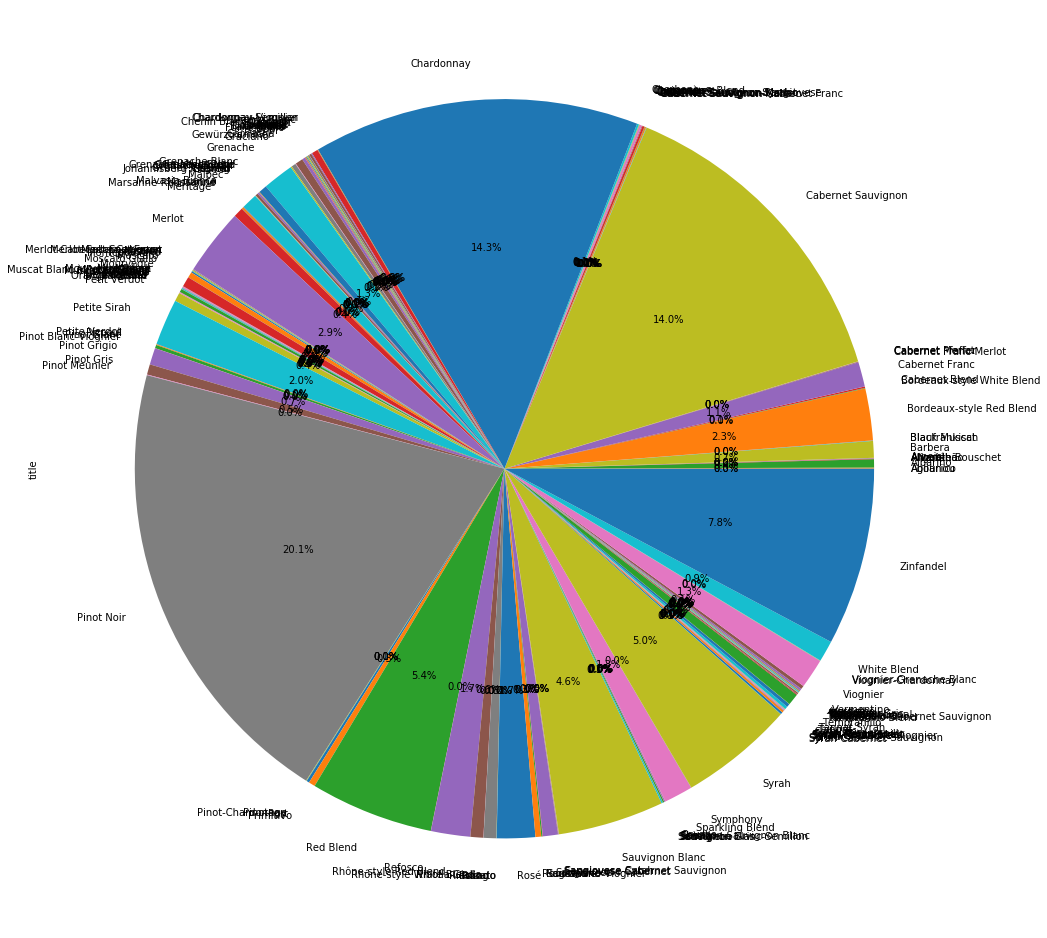

In [14]:
#ordered list of counts of CA wines
ca_varietal = clean_ca_wines.groupby('variety')
ca_type_count = ca_varietal['title'].count()
print([ca_type_count.sort_values(ascending=False).head(20)])
ca_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')


[variety
Pinot Noir                  6260
Cabernet Sauvignon          4081
Chardonnay                  4005
Syrah                       2254
Red Blend                   2058
Riesling                    1470
Zinfandel                   1449
Merlot                      1362
Bordeaux-style Red Blend    1248
Sauvignon Blanc             1178
Pinot Gris                   710
Cabernet Franc               698
Rosé                         667
Rhône-style Red Blend        527
Viognier                     498
Malbec                       445
Petite Sirah                 417
White Blend                  406
Grenache                     394
Sparkling Blend              358
Name: title, dtype: int64]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B8783088>],
      dtype=object)

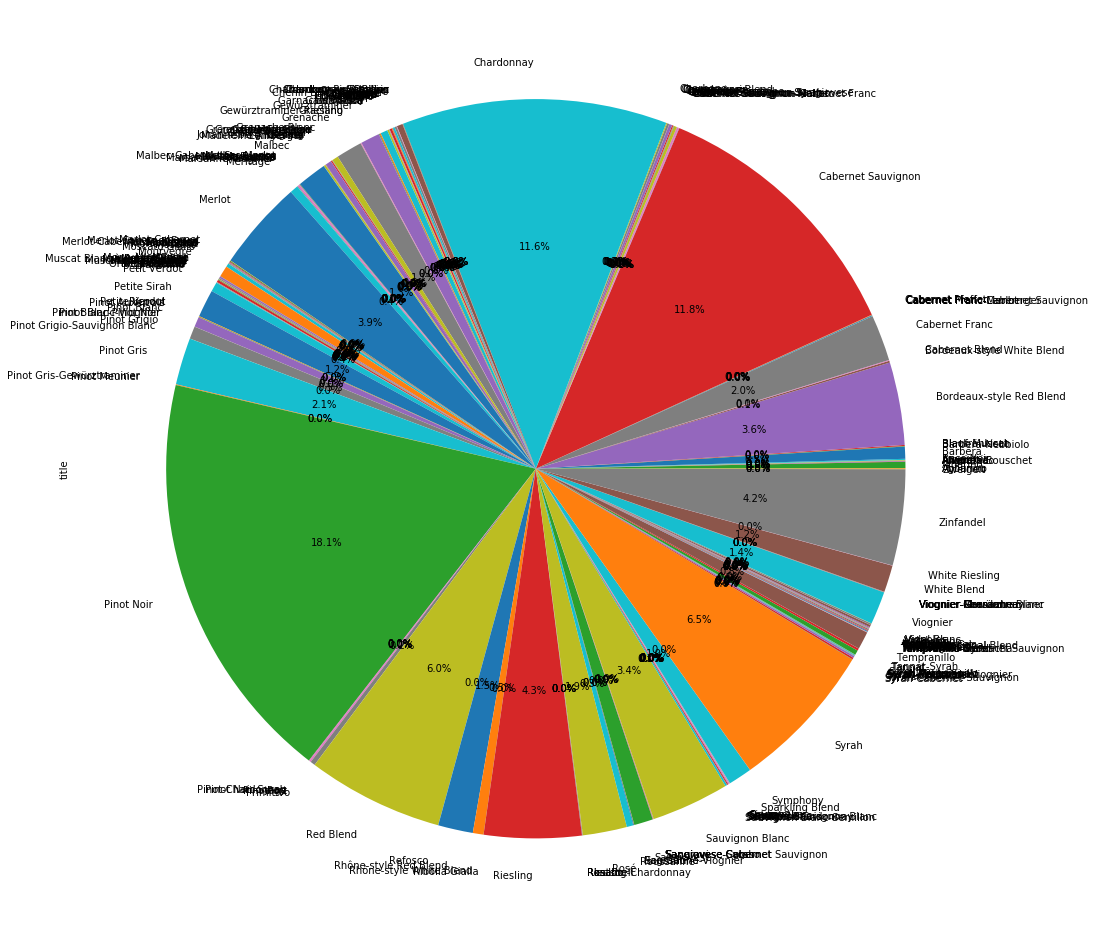

In [15]:
gbl_varietal = clean_gbl_wines.groupby('variety')
gbl_type_count = gbl_varietal['title'].count()
print([gbl_type_count.sort_values(ascending=False).head(20)])
gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

[variety
Pinot Noir                  2688
Cabernet Sauvignon          1536
Chardonnay                  1418
Riesling                    1365
Syrah                       1314
Red Blend                   1004
Bordeaux-style Red Blend     843
Merlot                       829
Pinot Gris                   631
Cabernet Franc               497
Rosé                         343
Sauvignon Blanc              324
Malbec                       320
Viognier                     256
Gewürztraminer               250
White Blend                  205
Rhône-style Red Blend        187
Tempranillo                  180
Sangiovese                   158
Grenache                     145
Name: title, dtype: int64]


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000266B85F3E88>],
      dtype=object)

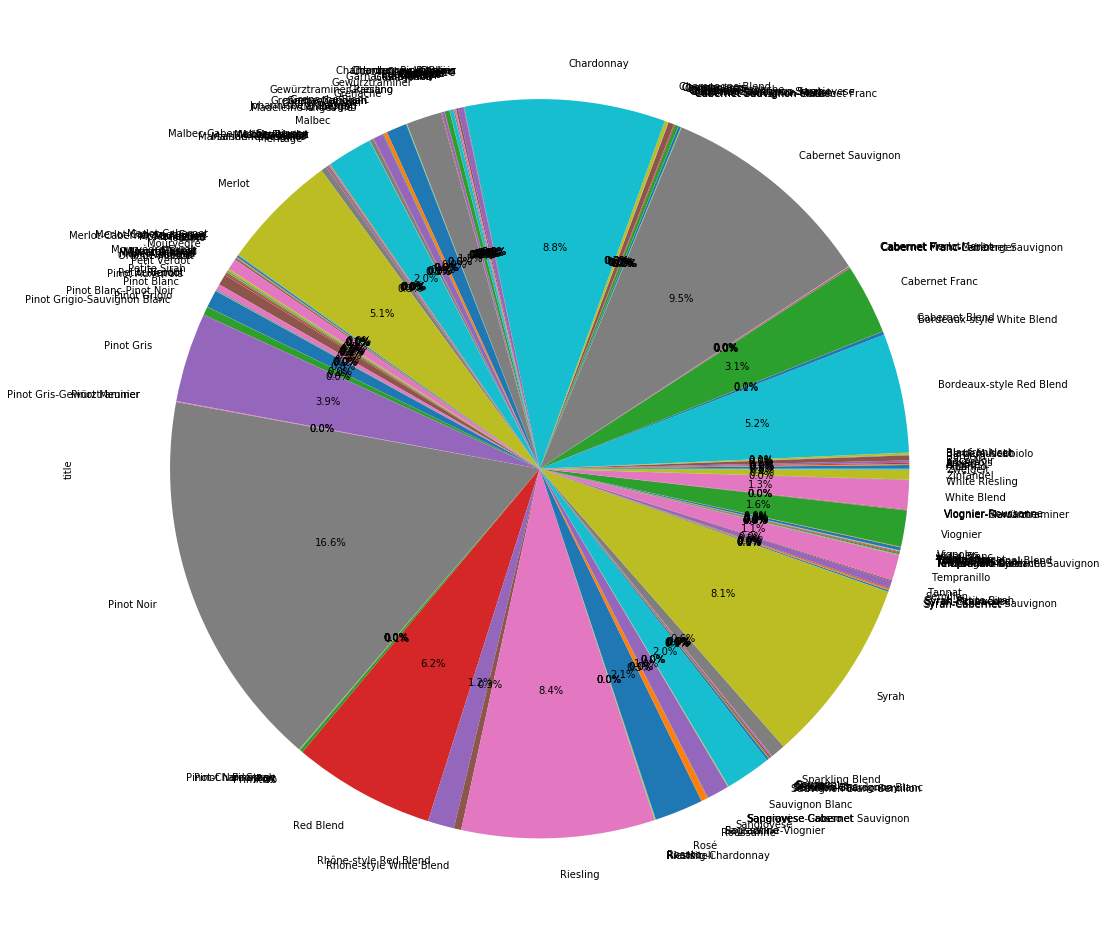

In [16]:
noca_gbl_varietal = clean_gbl_wines_noca.groupby('variety')
noca_gbl_type_count = noca_gbl_varietal['title'].count()
print([noca_gbl_type_count.sort_values(ascending=False).head(20)])
noca_gbl_type_count.plot.pie(figsize=(17,17),subplots=True,autopct='%1.1f%%')

In [22]:
# extract year from column title
clean_ca_wines_yr = clean_ca_wines.copy()

for index, row in clean_ca_wines_yr.iterrows():
    if len(''.join(filter(lambda i: i.isdigit(), clean_ca_wines_yr['title'][index]))) == 4:
        clean_ca_wines_yr.loc[index, 'year'] = ''.join(filter(lambda i: i.isdigit(), clean_ca_wines_yr['title'][index]))

print([clean_ca_wines_yr.count()])
reclean_ca_wines_yr = clean_ca_wines_yr.dropna()
reclean_ca_wines_yr.count()

[index          17408
country        17408
points         17408
price          17408
province       17408
region_1       17408
region_2       17408
taster_name    17408
title          17408
variety        17408
winery         17408
year           16528
dtype: int64]


index          16528
country        16528
points         16528
price          16528
province       16528
region_1       16528
region_2       16528
taster_name    16528
title          16528
variety        16528
winery         16528
year           16528
dtype: int64

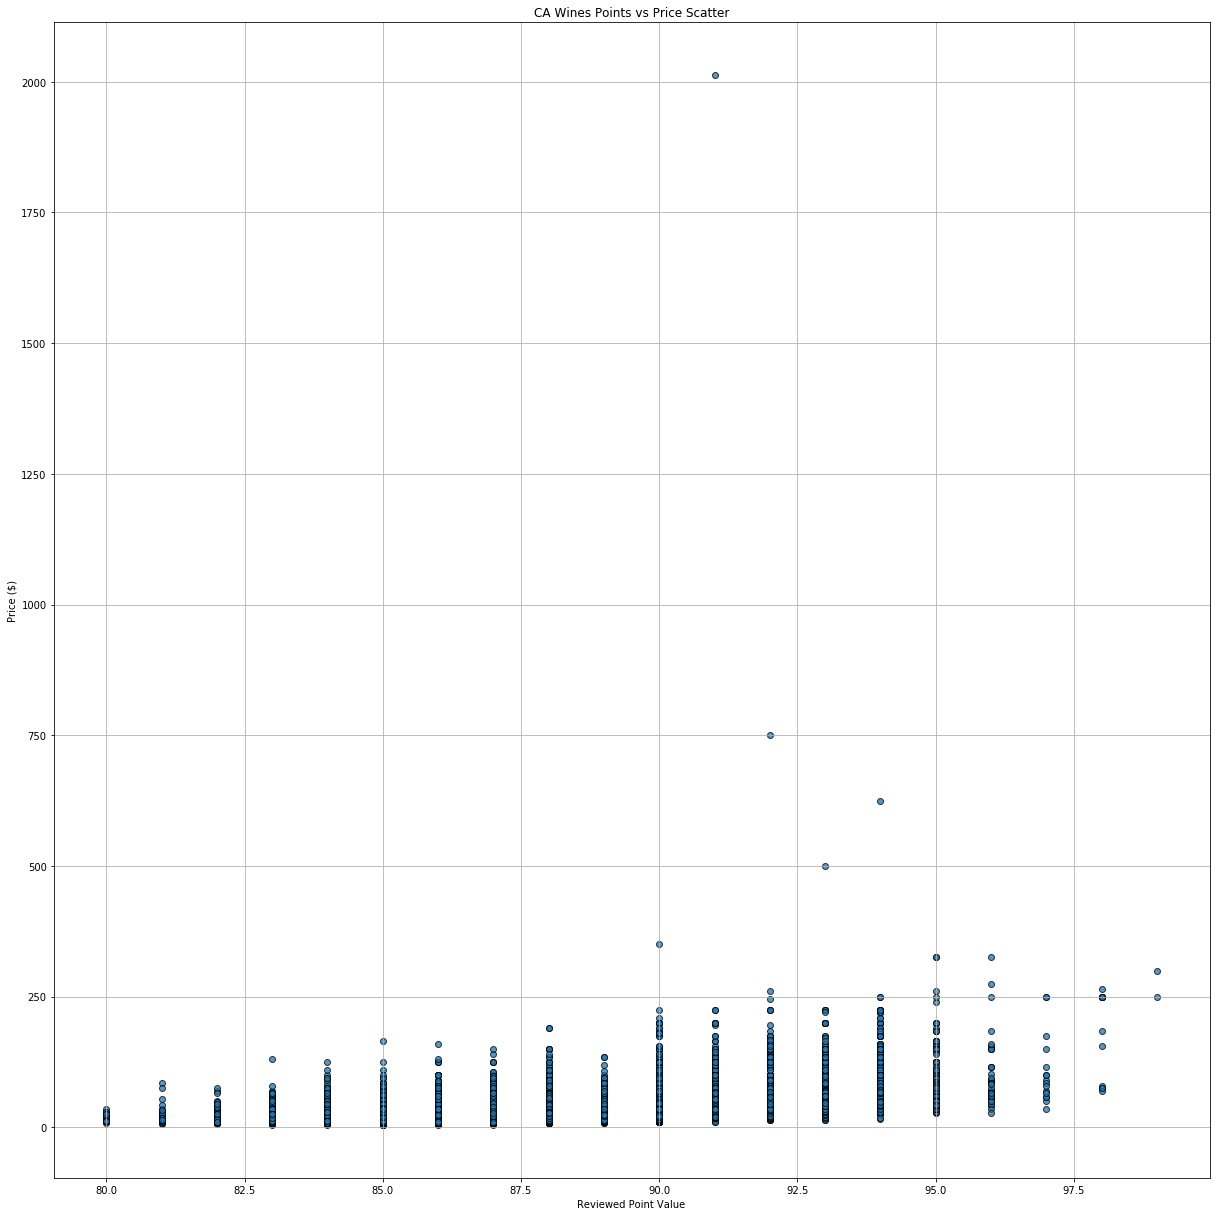

In [17]:
# points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_ca_wines['points'], clean_ca_wines['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"CA Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.39


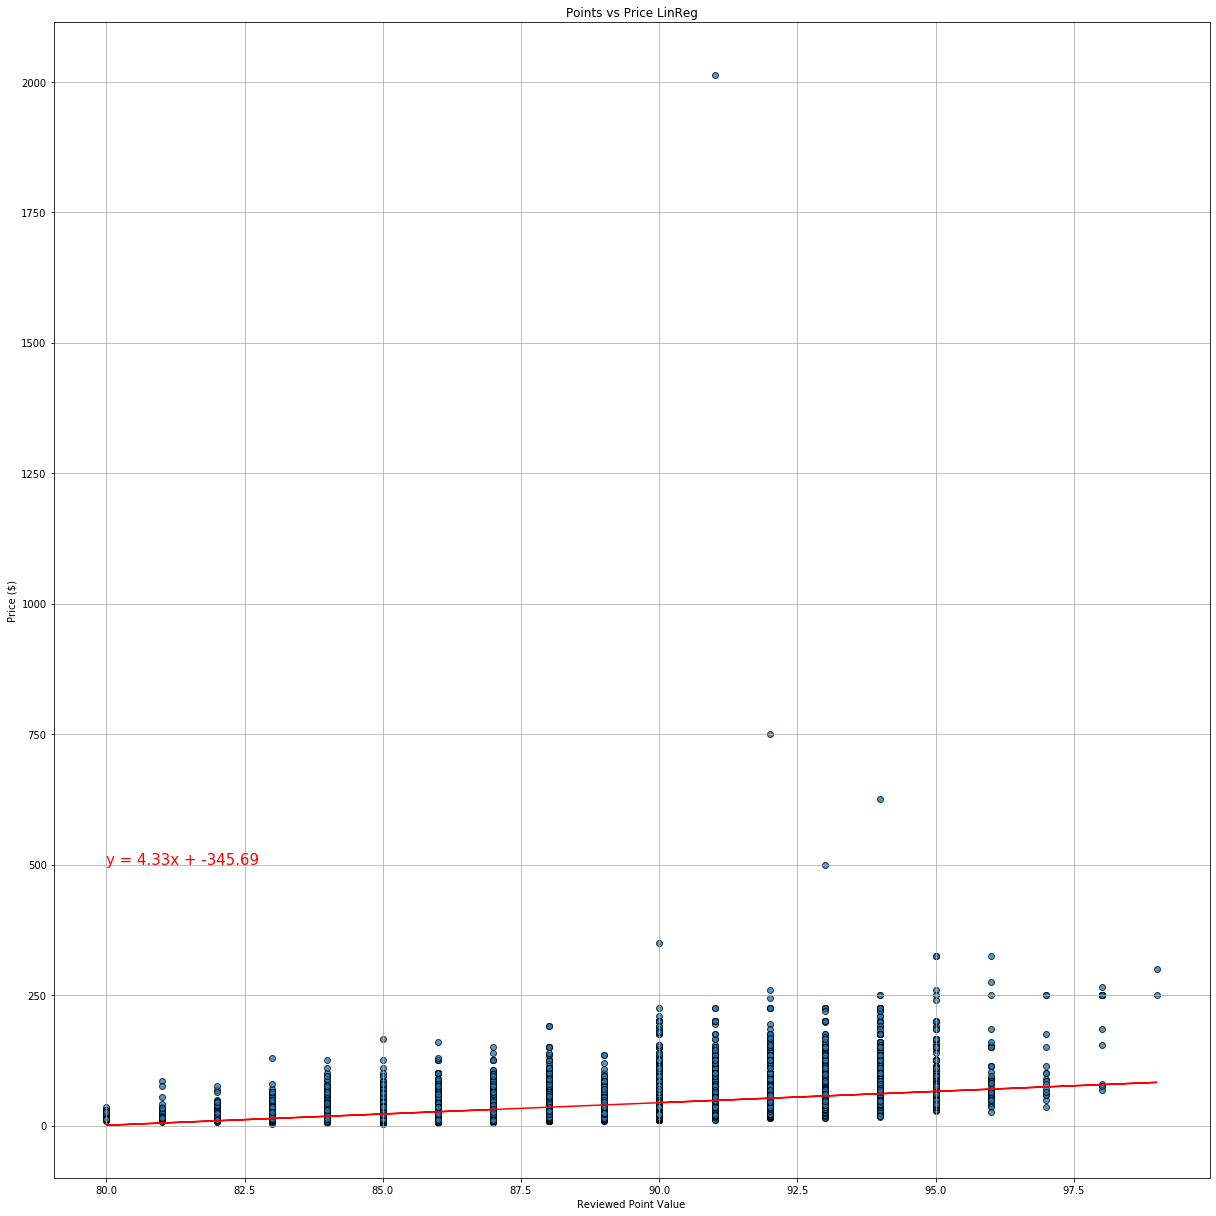

In [24]:
x_values = clean_ca_wines['points'].astype(float)
y_values = clean_ca_wines['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(st.pearsonr(x_values,y_values)[0],2)} for CA Wines")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"CA Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,500),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

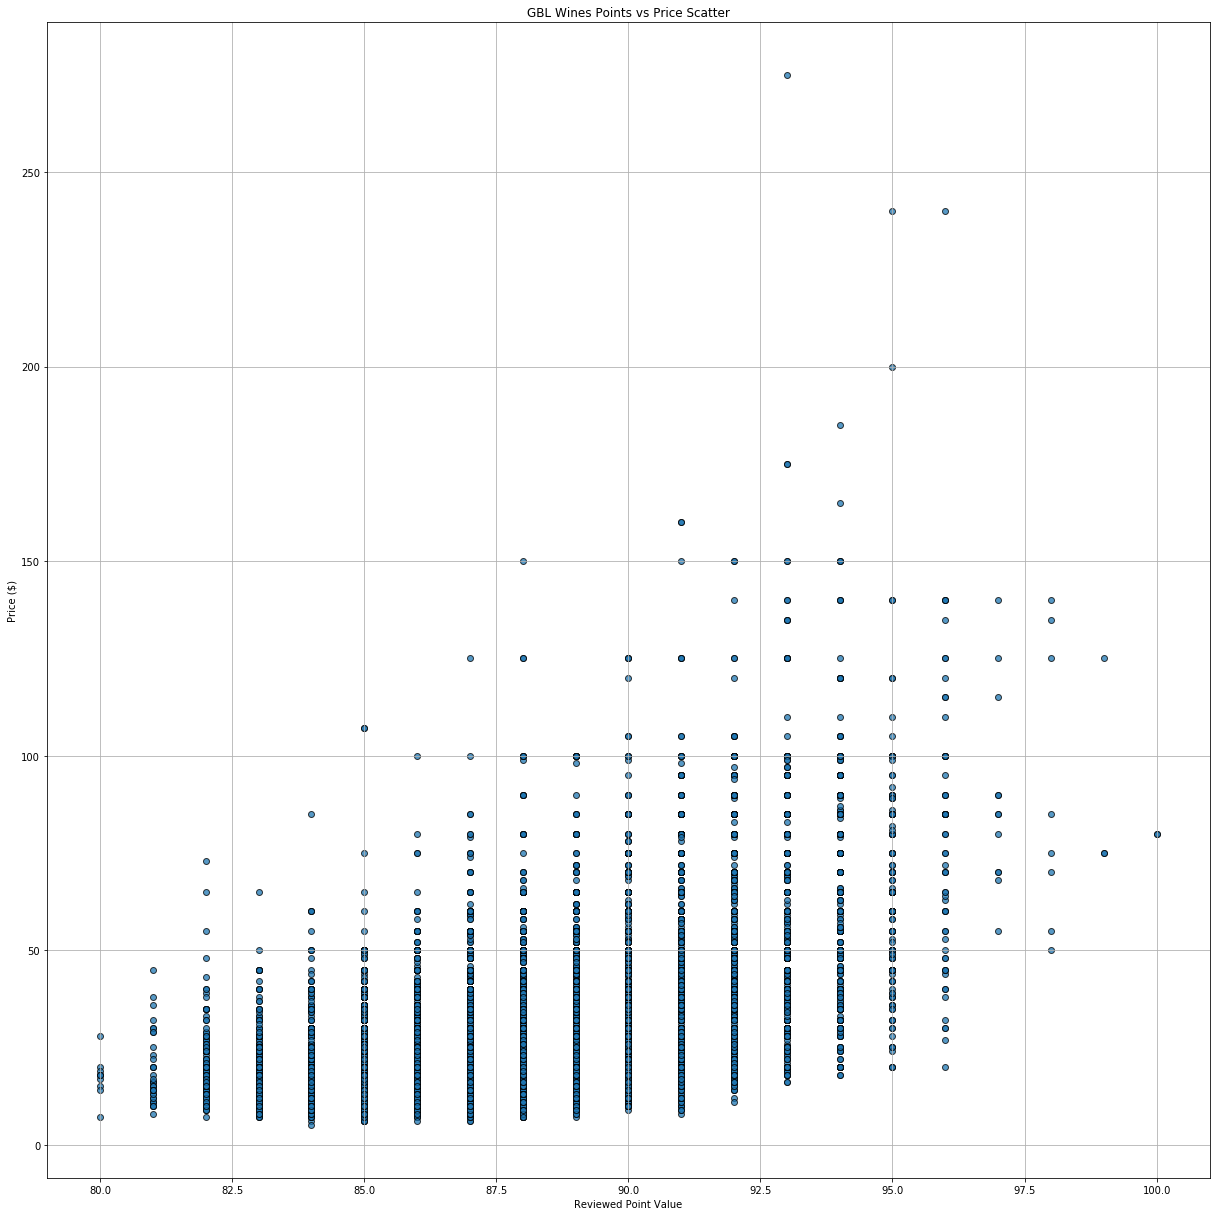

In [25]:
# GBL no CA points vs price
plt.figure(figsize=(17, 17))
plt.scatter(clean_gbl_wines_noca['points'], clean_gbl_wines_noca['price'], alpha=.75, edgecolors="k")
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.title(f"GBL Wines Points vs Price Scatter")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
# tight_layout. This module provides routines to adjust subplot params so that subplots are nicely fit in the figure. https://matplotlib.org/api/tight_layout_api.html
plt.show()

The correlation coefficient between Review Points and Price is 0.53 for GBL Wines not from CA


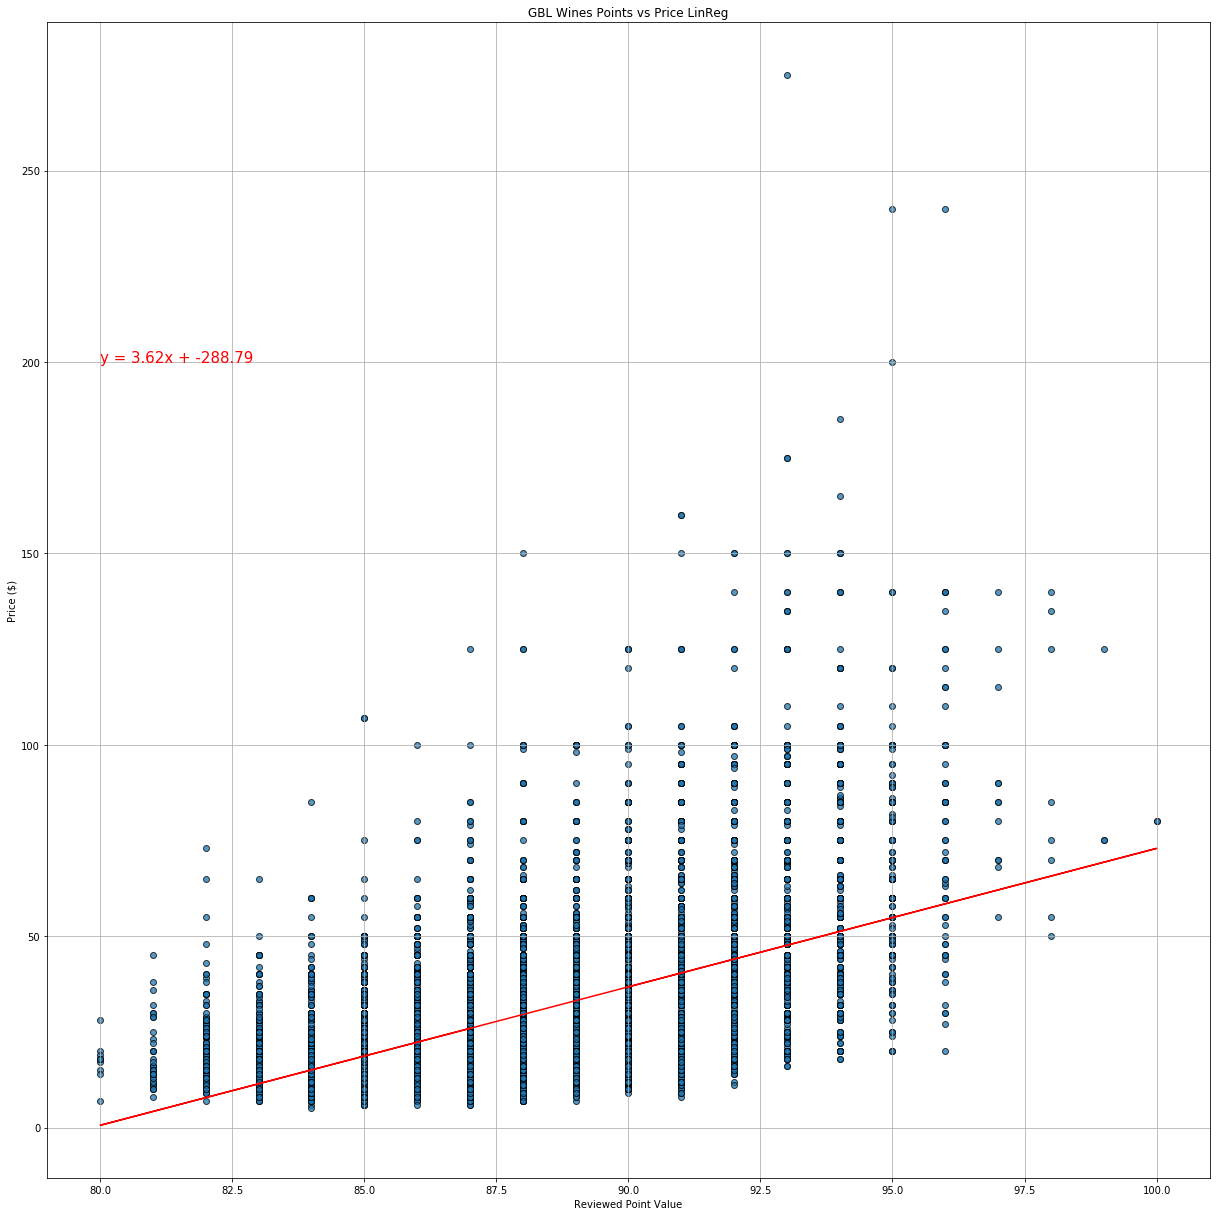

In [27]:
x_values = clean_gbl_wines_noca['points'].astype(float)
y_values = clean_gbl_wines_noca['price'].astype(float)

# Calculate Pearson r value
print(f"The correlation coefficient between Review Points and Price is {round(st.pearsonr(x_values,y_values)[0],2)} for GBL Wines not from CA")

# Calculate line for plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Create plot and labels

plt.figure(figsize=(17, 17))
plt.title(f"GBL Wines Points vs Price LinReg")
plt.scatter(x_values,y_values, alpha=.75, edgecolors="k") 
# x,y required , alpha sets opacity, edgecolors help datapoint stand out https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(80,200),fontsize=15,color="red")
plt.ylabel("Price ($)")
plt.xlabel("Reviewed Point Value")
plt.grid(True) 
plt.tight_layout() 
plt.show()

In [40]:
good_value_wines = clean_gbl_wines.loc[(clean_gbl_wines['price'] <= 20) & (clean_gbl_wines['points'] >= 94)]
good_value_wines

,index,Unnamed: 0,country,points,price,province,region_1,region_2,taster_name,title,variety,winery
1367,5011,5011,US,95,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham
1736,6267,6267,US,94,18.0,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle
4623,17294,17294,US,94,20.0,Washington,Yakima Valley,Columbia Valley,Paul Gregutt,Brian Carter Cellars 2009 Opulento Dessert Win...,Port,Brian Carter Cellars
8361,32258,32258,US,94,20.0,Oregon,Chehalem Mountains,Willamette Valley,Paul Gregutt,Timothy Malone 2016 Medici Vineyard Riesling (...,Riesling,Timothy Malone
14133,54276,54276,US,94,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Poet's Leap 2012 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap
15425,59290,59290,US,94,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Poet's Leap 2012 Riesling (Columbia Valley (WA)),Riesling,Poet's Leap
15428,59303,59303,US,94,20.0,Washington,Red Mountain,Columbia Valley,Paul Gregutt,Guardian 2012 Angel Sauvignon Blanc (Red Mount...,Sauvignon Blanc,Guardian
18134,69523,69523,US,94,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Dunham 2009 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham
18135,69526,69526,US,94,16.0,California,Lodi,Central Valley,Virginie Boone,Uvaggio 2010 Secco Moscato Giallo (Lodi),Moscato Giallo,Uvaggio
19970,76570,76570,US,95,20.0,Washington,Columbia Valley (WA),Columbia Valley,Paul Gregutt,Januik 2012 Bacchus Vineyard Riesling (Columbi...,Riesling,Januik


In [47]:
good_value_wines3 = clean_wine_df3.loc[(clean_wine_df3['price'] <= 20) & (clean_wine_df3['points'] >= 94)]
good_value_wines3

,Unnamed: 0,country,points,price,province,region_1,taster_name,title,variety,winery
5011,5011,US,95,20.0,Washington,Columbia Valley (WA),Paul Gregutt,Dunham 2010 Lewis Estate Vineyard Riesling (Co...,Riesling,Dunham
6267,6267,US,94,18.0,Washington,Yakima Valley,Paul Gregutt,Stottle 2011 Lucille Late Harvest Viognier (Ya...,Viognier,Stottle
15196,15196,France,95,20.0,Southwest France,Madiran,Roger Voss,Alain Brumont 2010 Château Bouscassé Red (Madi...,Red Blend,Alain Brumont
17294,17294,US,94,20.0,Washington,Yakima Valley,Paul Gregutt,Brian Carter Cellars 2009 Opulento Dessert Win...,Port,Brian Carter Cellars
17983,17983,France,94,20.0,Provence,Coteaux d'Aix-en-Provence,Roger Voss,Château Vignelaure 2016 Rosé (Coteaux d'Aix-en...,Rosé,Château Vignelaure
19136,19136,Spain,94,14.0,Andalucia,Jerez,Michael Schachner,Osborne NV Pedro Ximenez 1827 Sweet Sherry She...,Sherry,Osborne
20364,20364,France,94,20.0,Alsace,Alsace,Roger Voss,Domaine Marcel Deiss 2011 White (Alsace),White Blend,Domaine Marcel Deiss
26432,26432,Italy,94,20.0,Sicily & Sardinia,Terre Siciliane,Kerin O’Keefe,Le Casematte 2014 Peloro Red (Terre Siciliane),Red Blend,Le Casematte
32258,32258,US,94,20.0,Oregon,Chehalem Mountains,Paul Gregutt,Timothy Malone 2016 Medici Vineyard Riesling (...,Riesling,Timothy Malone
39318,39318,France,94,18.0,Southwest France,Jurançon,Roger Voss,Domaine Cauhapé 2011 Symphonie de Novembre (J...,Petit Manseng,Domaine Cauhapé
